In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC sovrasmorzato.csv'
fr = pd.read_csv(FILE)

In [6]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (Volt)'])
sigmaV = 0.04 / np.sqrt(12)

R = 10000 #ohm 1%
sigmaR = 100

L = 83.9 * 10**-3 #Hr
sigmaL = 0.3* 10**-3 #Hr

C =  104.7* 10**-9 # ± 0.3)e-9 F
sigmaC = 0.3 * 10**-9 # F

Vg = 4 #Volt

w2 = 1 / (L*C)
γ = R / (2*L)
β = np.sqrt(γ**2 - w2)

$
\beta = \sqrt{\omega^2 - \gamma^2}
$

In [9]:
w2 = 1 / (L*C)
sigmaw2 = np.abs(1/(L*C))*np.sqrt((sigmaL/L)**2 + (sigmaC/C)**2)

γ = R / (2*L)
dγ_dR = 1 / (2 * L)
dγ_dL = -R / (2 * L**2)
sigmaγ = np.sqrt((dγ_dR * sigmaR)**2 + (dγ_dL * sigmaL)**2)

β = np.sqrt(γ**2 - w2)
dβ_dw = 0.5 / np.sqrt(γ**2 - w2)
dβ_dγ = -γ / np.sqrt(γ**2 - w2)
sigmaβ = np.sqrt((dβ_dw * sigmaw2)**2 + (dβ_dγ * sigmaγ)**2)

$
V_r = V_0 \cdot e^{-\gamma t} \cdot (\exp(\beta t) - \exp(-\beta t))
$

In [10]:
def VR(t,V0,γ,β):
    return V0 * np.exp(-γ*t) * (np.exp(β*t) - np.exp(-β*t))

In [11]:
Vg_guess = 4 #Volt
i = Interpolazione(t,V,VR,sigmaV,p0=[Vg_guess,γ,β])
print(i)

   
Parameters: [7.95832194e+00 5.29769986e+04 5.19504695e+04] 
Sigma parameters: [2.30340358e-02 6.22429244e+02 6.24390107e+02]

sigmaY: 0.011547005383792516

chiquadro ridotto: 22.55
df: 90
pvalue: 100.0%
covariance matrix: [[ 4.96888789e-04 -8.33426125e+00 -8.40392032e+00]
 [-8.33426125e+00  3.62826584e+05  3.63961891e+05]
 [-8.40392032e+00  3.63961891e+05  3.65116238e+05]]    



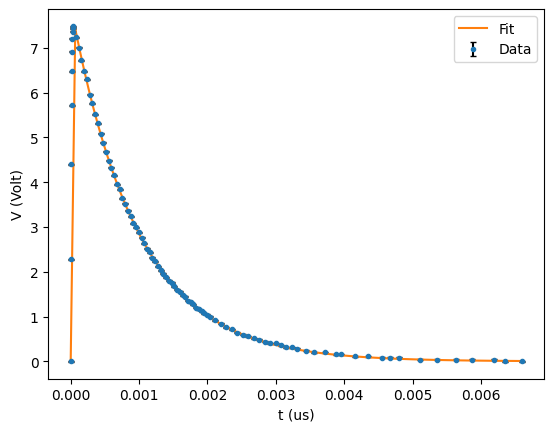

In [14]:
plt.errorbar(t, V, yerr=sigmaV, fmt='.', label='Data',ecolor='black',capsize=2)
plt.plot(i.x_best, i.y_best, label='Fit')
plt.xlabel('t (us)')
plt.ylabel('V (Volt)')
plt.legend()
plt.show()
